In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


act = pd.read_csv('OTg6QzA_activities.csv')
act.shape #데이터 구조, 행열 크기 알아보기


(66281, 4)

In [2]:
#22년1월1일 데이터만 추출해서, 가시화를 해보자
data220101 = act.copy()
data220101 = act[ (act['timestamp'] >= '2022-01-01 00:00:00.000')  & (act['timestamp'] < '2022-01-02 00:00:00.000') ]

data220101 = data220101.copy()
data220101['p_timestamp'] = data220101.timestamp.shift(1)
data220101['p_x'] = data220101['X'].shift(1)
data220101['p_y'] = data220101['Y'].shift(1)
data220101['p_z'] = data220101['Z'].shift(1)
data220101.head(5)

,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z
0,2022-01-01 00:01:40.363,33,76,56,None,NaN,NaN,NaN
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0


In [3]:
# NaN 값이 있는 행을 삭제하자. NaN가 있으면 거리 및 속도 계산할 수 없다.
# 첫번째 행이 삭제될 것이다.
cleaned = data220101.dropna()
cleaned.head(5)

,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0


In [4]:
import time
from datetime import datetime


# 10분단위별 활동지수
def make_hour_unixtime(df):
    temp = datetime.strptime(df['timestamp'], "%Y-%m-%d %H:%M:%S.%f")
    return int(time.mktime(temp.timetuple()) // 600)

# 10분 단위 문자열 만들기
def hour_min(df):
    d = datetime.strptime(df['timestamp'], "%Y-%m-%d %H:%M:%S.%f")
    newt1 = int(time.mktime(d.timetuple()) // 600) * 600
    newt2 = datetime.fromtimestamp(newt1)
    return "{:02d}:{:02d}".format(newt2.hour, newt2.minute)
    
tenmin = cleaned.copy()
tenmin['utime'] =cleaned[["timestamp"]].apply(make_hour_unixtime, axis=1)
tenmin['hm'] =cleaned[["timestamp"]].apply(hour_min, axis=1)
tenmin.head(5)

,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,utime,hm
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,2734938,00:00
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,2734938,00:00
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,2734938,00:00
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,2734938,00:00
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,2734938,00:00


In [5]:
# 거리 계산
def calc_dist(df):
    x_d = df['X'] - df['p_x']
    y_d = df['Y'] - df['p_y']
    z_d = df['Z'] - df['p_z']
    return np.sqrt(x_d**2 + y_d**2 + z_d**2)
       

tenmin['dist'] = tenmin[["X","p_x", "Y", "p_y", "Z", "p_z"]].apply(calc_dist, axis=1)
tenmin.head(5)

,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,utime,hm,dist
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,2734938,00:00,11.045361
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,2734938,00:00,12.884099
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,2734938,00:00,23.790755
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,2734938,00:00,23.494680
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,2734938,00:00,12.649111


In [6]:
# 시간 차분을 구한 다음, d_time 열에 저장한다.
from datetime import datetime
import time


def calc_timediff(df):
    d1 = datetime.strptime(str(df['timestamp']), "%Y-%m-%d %H:%M:%S.%f")
    d2 = datetime.strptime(str(df['p_timestamp']), "%Y-%m-%d %H:%M:%S.%f")
    return (d1 - d2).total_seconds()

tenmin['d_time'] = tenmin[["timestamp", "p_timestamp"]].apply(calc_timediff, axis=1)
tenmin.head(5)

,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,utime,hm,dist,d_time
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,2734938,00:00,11.045361,2.598
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,2734938,00:00,12.884099,2.601
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,2734938,00:00,23.790755,2.601
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,2734938,00:00,23.494680,20.701
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,2734938,00:00,12.649111,12.901


In [7]:
# 속도를 구한 다음, calc_act 열에 저장한다.

def calc_act(df):
    if df['d_time'] != 0:
        return np.abs(df['dist'] / df['d_time'])
    else:
        # 정상적인 수가 아님.
        return 0


tenmin['calc_act'] = tenmin[["dist", "d_time"]].apply(calc_act, axis=1)
tenmin.head(5)

,timestamp,X,Y,Z,p_timestamp,p_x,p_y,p_z,utime,hm,dist,d_time,calc_act
1,2022-01-01 00:01:42.961,34,87,56,2022-01-01 00:01:40.363,33.0,76.0,56.0,2734938,00:00,11.045361,2.598,4.251486
2,2022-01-01 00:01:45.562,25,89,47,2022-01-01 00:01:42.961,34.0,87.0,56.0,2734938,00:00,12.884099,2.601,4.953517
3,2022-01-01 00:01:48.163,11,70,50,2022-01-01 00:01:45.562,25.0,89.0,47.0,2734938,00:00,23.790755,2.601,9.146772
4,2022-01-01 00:02:08.864,33,72,58,2022-01-01 00:01:48.163,11.0,70.0,50.0,2734938,00:00,23.494680,20.701,1.134954
5,2022-01-01 00:02:21.765,21,68,58,2022-01-01 00:02:08.864,33.0,72.0,58.0,2734938,00:00,12.649111,12.901,0.980475


In [54]:
# unxtime으로 그룹핑하기
# grouped = tenmin.groupby(['utime'])
# grouped_calc_act = grouped['calc_act']
# result = grouped_calc_act.agg(['mean', 'min', 'max'])
# result.head(5)

,mean,min,max
utime,,,
2734938,2.359774,0.205775,9.146772
2734939,3.804910,0.011198,12.985407
2734940,1.204413,0.176624,3.200697
2734941,0.065608,0.065608,0.065608
2734943,6.089196,0.070434,14.338601


In [11]:
# hm으로 그룹핑하기
grouped = tenmin.groupby(['hm'])
grouped_calc_act = grouped['calc_act']
result = grouped_calc_act.agg(['mean', 'min', 'max'])
result.head(5)


,mean,min,max
hm,,,
00:00,2.359774,0.205775,9.146772
00:10,3.804910,0.011198,12.985407
00:20,1.204413,0.176624,3.200697
00:30,0.065608,0.065608,0.065608
00:50,6.089196,0.070434,14.338601


In [15]:
#인덱스 hm을 열로 변환
result = result.reset_index()
result.head(5)


,hm,mean,min,max
0,00:00,2.359774,0.205775,9.146772
1,00:10,3.804910,0.011198,12.985407
2,00:20,1.204413,0.176624,3.200697
3,00:30,0.065608,0.065608,0.065608
4,00:50,6.089196,0.070434,14.338601


In [16]:
result.to_dict(orient='records')

[{'hm': '00:00',
  'mean': 2.359774251549589,
  'min': 0.20577474308624466,
  'max': 9.146772205590402},
 {'hm': '00:10',
  'mean': 3.8049098618070056,
  'min': 0.011198263277526233,
  'max': 12.985407488023244},
 {'hm': '00:20',
  'mean': 1.2044129884418076,
  'min': 0.1766236615473601,
  'max': 3.200697257187995},
 {'hm': '00:30',
  'mean': 0.06560836089278393,
  'min': 0.06560836089278393,
  'max': 0.06560836089278393},
 {'hm': '00:50',
  'mean': 6.089195511232362,
  'min': 0.0704338418501251,
  'max': 14.33860142106446},
 {'hm': '01:10',
  'mean': 3.9488587393602708,
  'min': 0.013023714442466812,
  'max': 7.813303126836438},
 {'hm': '02:00',
  'mean': 0.006503695115243924,
  'min': 0.006503695115243924,
  'max': 0.006503695115243924},
 {'hm': '02:20',
  'mean': 0.009195002394486364,
  'min': 0.009195002394486364,
  'max': 0.009195002394486364},
 {'hm': '02:50',
  'mean': 3.2698413922276095,
  'min': 0.02223306987989213,
  'max': 9.646104772295732},
 {'hm': '03:00',
  'mean': 10.07

In [ ]:
#id:OTg6QzA
#date: 2022-01-01에 저장하기



In [ ]:
"""
데이터 정제하기
"""

In [18]:
"""
근데 X 축 간격이 일정하지 않은 것 같다. 여러분의 눈이 정확했다. 노약자의 움직임이 감지된 정보만 DB에 저장되었기 때문에,
시간정보자체가 없는 것이다. 그럼 어떻게 하면 좋을까? 매 10번 마다 activity를 0인 DataFrame를 만들고,
집계된 자료를 그 DataFrame에 넣으면 되지않을까 라는 생각이 든다.
한번 상상한 대로 코드를 작성해 보자.
"""

from datetime import datetime


def hour_min(df):
    newt1 = df['utime'] * 600
    newt2 = datetime.fromtimestamp(newt1)
    return "{:02d}:{:02d}".format(newt2.hour, newt2.minute)


newtenmin = pd.DataFrame(np.empty((144,3)),
            columns=['utime', 'hm','mean'])

newtenmin[:] = np.nan

newtenmin['utime'] = np.arange(2734938,2735082,1)
newtenmin['hm'] = newtenmin[["utime"]].apply(hour_min, axis=1)

newtenmin

,utime,hm,mean
0,2734938,00:00,NaN
1,2734939,00:10,NaN
2,2734940,00:20,NaN
3,2734941,00:30,NaN
4,2734942,00:40,NaN
...,...,...,...
139,2735077,23:10,NaN
140,2735078,23:20,NaN
141,2735079,23:30,NaN
142,2735080,23:40,NaN


In [19]:
# hm으로 그룹핑하기
grouped = tenmin.groupby(['hm'])
grouped_calc_act = grouped['calc_act']
result = grouped_calc_act.agg(['mean'])

result

,mean
hm,
00:00,2.359774
00:10,3.804910
00:20,1.204413
00:30,0.065608
00:50,6.089196
...,...
23:00,4.334201
23:10,4.610322
23:20,1.577668


In [20]:
# result에서 평균값이 0를 넘는 값만 newtenmin로 결합해보자
newData = pd.merge(newtenmin, result [ result['mean'] > 0], on="hm", how="left")
newData

,utime,hm,mean_x,mean_y
0,2734938,00:00,NaN,2.359774
1,2734939,00:10,NaN,3.804910
2,2734940,00:20,NaN,1.204413
3,2734941,00:30,NaN,0.065608
4,2734942,00:40,NaN,NaN
...,...,...,...,...
139,2735077,23:10,NaN,4.610322
140,2735078,23:20,NaN,1.577668
141,2735079,23:30,NaN,7.753006
142,2735080,23:40,NaN,7.176995


In [21]:
# mean_x가 결측치면 mean_y값을 new_mean로 대입하라
newData['new_mean'] = newData['mean_x'].fillna(newData['mean_y'])
newData

,utime,hm,mean_x,mean_y,new_mean
0,2734938,00:00,NaN,2.359774,2.359774
1,2734939,00:10,NaN,3.804910,3.804910
2,2734940,00:20,NaN,1.204413,1.204413
3,2734941,00:30,NaN,0.065608,0.065608
4,2734942,00:40,NaN,NaN,NaN
...,...,...,...,...,...
139,2735077,23:10,NaN,4.610322,4.610322
140,2735078,23:20,NaN,1.577668,1.577668
141,2735079,23:30,NaN,7.753006,7.753006
142,2735080,23:40,NaN,7.176995,7.176995


In [22]:
# NaN값을 zero로 채우기
newData = newData.fillna(0)
newData


,utime,hm,mean_x,mean_y,new_mean
0,2734938,00:00,0.0,2.359774,2.359774
1,2734939,00:10,0.0,3.804910,3.804910
2,2734940,00:20,0.0,1.204413,1.204413
3,2734941,00:30,0.0,0.065608,0.065608
4,2734942,00:40,0.0,0.000000,0.000000
...,...,...,...,...,...
139,2735077,23:10,0.0,4.610322,4.610322
140,2735078,23:20,0.0,1.577668,1.577668
141,2735079,23:30,0.0,7.753006,7.753006
142,2735080,23:40,0.0,7.176995,7.176995


In [23]:
newData['hm']

0      00:00
1      00:10
2      00:20
3      00:30
4      00:40
       ...  
139    23:10
140    23:20
141    23:30
142    23:40
143    23:50
Name: hm, Length: 144, dtype: object

In [24]:
# 이전 평균값의 평균값
result['mean'].mean()

7.103082608605214

In [25]:
# 정제된 데이터 평균값의 평균값
newData['new_mean'].mean()

5.080677143655119

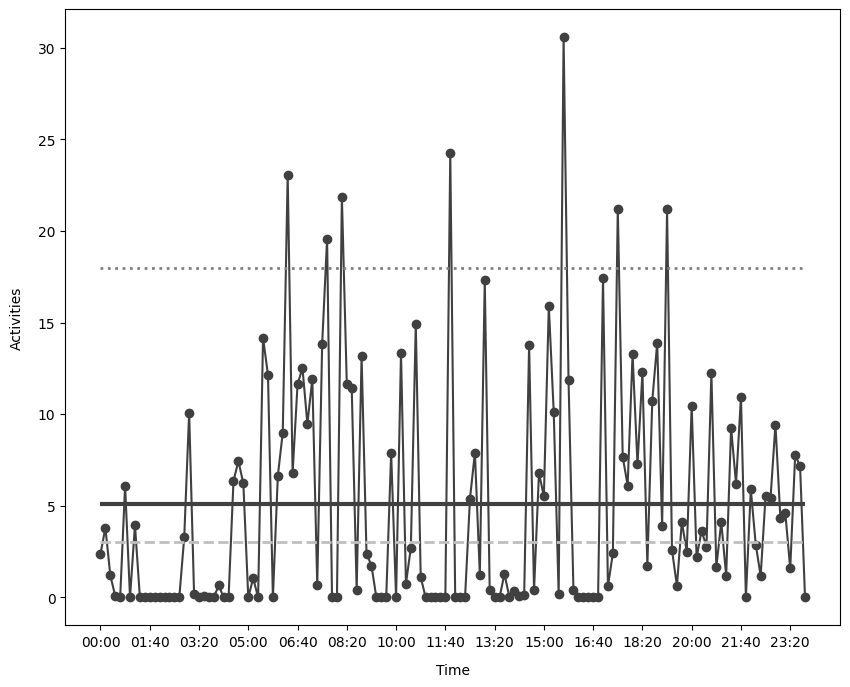

In [201]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)

ax.plot(newData['hm'], newData['new_mean'], c='0.25', marker='o')

# 전체 평균
ax.hlines(newData['new_mean'].mean(), newData['hm'].min(), newData['hm'].max(), color='0.25', linestyle='-', linewidth=3)

# 초당 평균 속도 18cm/sec이상이라면, 상체가 움직인다고 간주하고
ax.hlines(18, newData['hm'].min(), newData['hm'].max(), color='0.5', linestyle=':', linewidth=2)

# 초당 평균 속도 5cm/sec이하라면, 거의 움직임이 없다고 간주
ax.hlines(3, newData['hm'].min(), newData['hm'].max(), color='0.75', linestyle='--', linewidth=2)

# x tick를 10간격으로 표시
ax.set_xticks(ax.get_xticks()[::10])

# X, Y축 레이블 정하기
plt.xlabel('Time', labelpad=10)
plt.ylabel('Activities', labelpad=10)

plt.show()

In [35]:
# newData.set_index('hm')
# newData = newData.drop('utime', axis=1)


In [36]:
newData = newData.drop('mean_x', axis=1)


,hm,mean_y,new_mean
0,00:00,2.359774,2.359774
1,00:10,3.804910,3.804910
2,00:20,1.204413,1.204413
3,00:30,0.065608,0.065608
4,00:40,0.000000,0.000000
...,...,...,...
139,23:10,4.610322,4.610322
140,23:20,1.577668,1.577668
141,23:30,7.753006,7.753006
142,23:40,7.176995,7.176995


In [37]:
newData = newData.drop('mean_y', axis=1)


In [38]:
newData

,hm,new_mean
0,00:00,2.359774
1,00:10,3.804910
2,00:20,1.204413
3,00:30,0.065608
4,00:40,0.000000
...,...,...
139,23:10,4.610322
140,23:20,1.577668
141,23:30,7.753006
142,23:40,7.176995


In [79]:
newData.to_dict(orient='records')
# newData[['hm','new_mean']].to_dict(orient='records')

[{'mean': 2.359774251549589},
 {'mean': 3.8049098618070056},
 {'mean': 1.2044129884418076},
 {'mean': 0.06560836089278393},
 {'mean': 0.0},
 {'mean': 6.089195511232362},
 {'mean': 0.0},
 {'mean': 3.9488587393602708},
 {'mean': 0.0},
 {'mean': 0.0},
 {'mean': 0.0},
 {'mean': 0.0},
 {'mean': 0.006503695115243924},
 {'mean': 0.0},
 {'mean': 0.009195002394486364},
 {'mean': 0.0},
 {'mean': 0.0},
 {'mean': 3.2698413922276095},
 {'mean': 10.078717213462223},
 {'mean': 0.17279903999866023},
 {'mean': 0.0},
 {'mean': 0.06551221147753665},
 {'mean': 0.0},
 {'mean': 0.0},
 {'mean': 0.6570136607956756},
 {'mean': 0.0},
 {'mean': 0.0},
 {'mean': 6.3571245482230605},
 {'mean': 7.4447396321255095},
 {'mean': 6.220172490480662},
 {'mean': 0.0},
 {'mean': 1.0471097952629052},
 {'mean': 0.0},
 {'mean': 14.175092415862398},
 {'mean': 12.14011864991028},
 {'mean': 0.0},
 {'mean': 6.6455075968628945},
 {'mean': 8.993236446248575},
 {'mean': 23.056159349406983},
 {'mean': 6.787948439123898},
 {'mean': 11.6

In [43]:
newData = newData.set_index(keys=['hm'],)
newData

,new_mean
hm,
00:00,2.359774
00:10,3.804910
00:20,1.204413
00:30,0.065608
00:40,0.000000
...,...
23:10,4.610322
23:20,1.577668
23:30,7.753006


In [44]:
newData.to_dict('index')

{'00:00': {'new_mean': 2.359774251549589},
 '00:10': {'new_mean': 3.8049098618070056},
 '00:20': {'new_mean': 1.2044129884418076},
 '00:30': {'new_mean': 0.06560836089278393},
 '00:40': {'new_mean': 0.0},
 '00:50': {'new_mean': 6.089195511232362},
 '01:00': {'new_mean': 0.0},
 '01:10': {'new_mean': 3.9488587393602708},
 '01:20': {'new_mean': 0.0},
 '01:30': {'new_mean': 0.0},
 '01:40': {'new_mean': 0.0},
 '01:50': {'new_mean': 0.0},
 '02:00': {'new_mean': 0.006503695115243924},
 '02:10': {'new_mean': 0.0},
 '02:20': {'new_mean': 0.009195002394486364},
 '02:30': {'new_mean': 0.0},
 '02:40': {'new_mean': 0.0},
 '02:50': {'new_mean': 3.2698413922276095},
 '03:00': {'new_mean': 10.078717213462223},
 '03:10': {'new_mean': 0.17279903999866023},
 '03:20': {'new_mean': 0.0},
 '03:30': {'new_mean': 0.06551221147753665},
 '03:40': {'new_mean': 0.0},
 '03:50': {'new_mean': 0.0},
 '04:00': {'new_mean': 0.6570136607956756},
 '04:10': {'new_mean': 0.0},
 '04:20': {'new_mean': 0.0},
 '04:30': {'new_m

In [46]:
newData.columns

Index(['new_mean'], dtype='object')

In [47]:
# 칼럼 이름 변경하기
newData.columns = ['mean']

In [49]:
newData

,mean
hm,
00:00,2.359774
00:10,3.804910
00:20,1.204413
00:30,0.065608
00:40,0.000000
...,...
23:10,4.610322
23:20,1.577668
23:30,7.753006


In [50]:
newData.to_dict('index')

{'00:00': {'mean': 2.359774251549589},
 '00:10': {'mean': 3.8049098618070056},
 '00:20': {'mean': 1.2044129884418076},
 '00:30': {'mean': 0.06560836089278393},
 '00:40': {'mean': 0.0},
 '00:50': {'mean': 6.089195511232362},
 '01:00': {'mean': 0.0},
 '01:10': {'mean': 3.9488587393602708},
 '01:20': {'mean': 0.0},
 '01:30': {'mean': 0.0},
 '01:40': {'mean': 0.0},
 '01:50': {'mean': 0.0},
 '02:00': {'mean': 0.006503695115243924},
 '02:10': {'mean': 0.0},
 '02:20': {'mean': 0.009195002394486364},
 '02:30': {'mean': 0.0},
 '02:40': {'mean': 0.0},
 '02:50': {'mean': 3.2698413922276095},
 '03:00': {'mean': 10.078717213462223},
 '03:10': {'mean': 0.17279903999866023},
 '03:20': {'mean': 0.0},
 '03:30': {'mean': 0.06551221147753665},
 '03:40': {'mean': 0.0},
 '03:50': {'mean': 0.0},
 '04:00': {'mean': 0.6570136607956756},
 '04:10': {'mean': 0.0},
 '04:20': {'mean': 0.0},
 '04:30': {'mean': 6.3571245482230605},
 '04:40': {'mean': 7.4447396321255095},
 '04:50': {'mean': 6.220172490480662},
 '05:0

In [73]:
import os
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db

# filepath = os.path.abspath(os.path.dirname(__file__)) + "/healthcarebigdataplaybookkr-firebase-adminsdk-aiufs-e99afb3c9b.json"
# # filepath = ""
cred = credentials.Certificate('healthcarebigdataplaybookkr-firebase-adminsdk-aiufs-e99afb3c9b.json')
# # firebase_admin.initialize_app(cred, {
# #     'databaseURL' : 'https://healthcarebigdataplaybookkr-default-rtdb.asia-southeast1.firebasedatabase.app/'
# # })



# default_app = firebase_admin.initialize_app(cred)

# print(default_app.name)



In [74]:
firebase_admin.initialize_app(cred, {
    'databaseURL' : 'https://healthcarebigdataplaybookkr-default-rtdb.asia-southeast1.firebasedatabase.app/'
})

ValueError: The default Firebase app already exists. This means you called initialize_app() more than once without providing an app name as the second argument. In most cases you only need to call initialize_app() once. But if you do want to initialize multiple apps, pass a second argument to initialize_app() to give each app a unique name.

In [78]:
default_app = firebase_admin.initialize_app()


ValueError: The default Firebase app already exists. This means you called initialize_app() more than once without providing an app name as the second argument. In most cases you only need to call initialize_app() once. But if you do want to initialize multiple apps, pass a second argument to initialize_app() to give each app a unique name.

In [75]:
dir = db.reference()

ValueError: Invalid database URL: "None". Database URL must be a non-empty URL string.